In [ ]:
# IGNORE THIS IF NOT USED IN GOOGLE COLAB
# !pip install susi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import susi
import json
import requests
import pandas as pd
from susi.SOMPlots import plot_nbh_dist_weight_matrix, plot_umatrix, plot_estimation_map, plot_som_histogram

In [56]:
# @title Import Data
url_radio_data_noise = 'https://radioexplorations.ch/study-2/data/df_fma_entropy_radio.json'
url_radio_data_fingerprint = 'https://radioexplorations.ch/study-2/data/df_radio_data.json'
url_fma_data_noise = 'https://radioexplorations.ch/study-2/data/df_fma_entropy_data.json'
url_fma_data_fingerprint = 'https://radioexplorations.ch/study-2/data/df_small_data.json'

# get radio noise dataset
radio_data_noise = requests.get(url_radio_data_noise)
radio_data_noise = radio_data_noise.json()
radio_data_noise.pop('bmus-proj')
df_radio_noise = pd.DataFrame.from_dict(radio_data_noise)

# get radio fingerprint dataset
radio_data_fingerprint = requests.get(url_radio_data_fingerprint)
radio_data_fingerprint = radio_data_fingerprint.json()
radio_data_fingerprint.pop('bmus-proj')
df_radio_fingerprint = pd.DataFrame.from_dict(radio_data_fingerprint)

# get fma noise dataset
fma_data_noise = requests.get(url_fma_data_noise)
fma_data_noise = fma_data_noise.json()
df_fma_noise = pd.DataFrame.from_dict(fma_data_noise)

# get fma fingerprint dataset
fma_data_fingerprint = requests.get(url_fma_data_fingerprint)
fma_data_fingerprint = fma_data_fingerprint.json()
df_fma_fingerprint = pd.DataFrame.from_dict(fma_data_fingerprint)


In [145]:
# @title Set current active DataFrame
# current_df = df_radio_noise
# current_df = df_fma_fingerprint
current_df = df_radio_fingerprint


In [146]:
train_data = current_df["fingerprints"].to_numpy()
# train_data = current_df["noise"].to_numpy()
# print(train_data[0][0][0])
print(isinstance(train_data[0][0], list))
train_data_length = len(train_data)
print(train_data_length)
temp = []
for item in train_data:
    if isinstance(item, list):
        l = len(train_data[0][0][0])
        for deep_item in item:
            if not deep_item:
                print('empty list')
            else:
                temp.append(deep_item[0])
    else:
        temp.push(np.array(item))
    # print(type(item[0][0][0]))
    # train_data[i] = np.array(item).flatten()
if isinstance(train_data[0][0], list):
    train_data = temp
else:
    train_data = [l.tolist() for l in train_data]
print(len(train_data))
train_data_length = len(train_data)


True
602
983


In [147]:
for item in train_data:
    print(len(item))

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [148]:
# 5 * sqrt(number of training samples)
grid = math.ceil(5 * math.sqrt(train_data_length))
grid = math.floor(math.sqrt(grid))
print(grid)

# this returns "ideal" grid size
# maybe is a parameter that students can play around as well

12


In [149]:
# @title Unsupervised Learning
som = susi.SOMClustering(
    n_rows=grid,
    n_columns=grid,
    n_iter_unsupervised=40000
)
som.fit(train_data)
print("SOM fitted!")

SOM fitted!


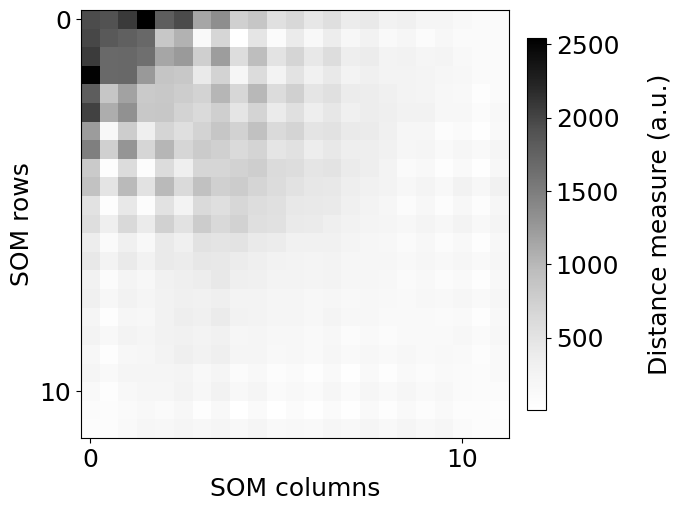

In [150]:
u_matrix = som.get_u_matrix()
plot_umatrix(u_matrix, grid, grid)
plt.show()

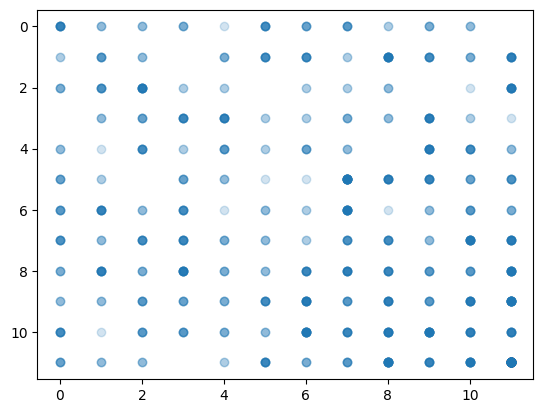

In [151]:
y = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']



clusters = som.get_clusters(np.asarray(train_data))
plt.scatter(x=[c[1] for c in clusters], y=[c[0] for c in clusters], alpha=0.2)
plt.gca().invert_yaxis()
plt.show()



In [154]:
# f = open('../data.json')
# json_data = json.load(f)
# print(json_data)
# type(json_data)
data_from_node = []
for x in range(grid):
    for y in range(grid):
        obj = {"x": x, "y": y}
        data = som.get_datapoints_from_node((x, y))
        obj["data"] = data
        obj["val"] = len(data)
        data_from_node.append(obj)

print(data_from_node)


def get_min_max(data):
    values_arr = [x["val"] for x in data]
    minimum = min(values_arr)
    maximum = max(values_arr)
    avg = np.average(values_arr)
    return [minimum, maximum, avg]


print(get_min_max(data_from_node))


# from https://stackoverflow.com/questions/1969240/mapping-a-range-of-values-to-another
def map(value, original_min, original_max, mapped_min, mapped_max):
    # Figure out how 'wide' each range is
    leftSpan = original_max - original_min
    rightSpan = mapped_max - mapped_min

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - original_min) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return round(mapped_min + (valueScaled * rightSpan))


def clamp(n, smallest, largest):
    return max(smallest, min(n, largest))



def make_color_palette(data):
    minmax = get_min_max(data)
    length = len(data)
    for i in range(length):
        item = data[i]
        r = map(item["val"], minmax[0], minmax[2], 0, 255)
        r = clamp(r, 0, 255)
        g = clamp(map(item["val"], minmax[0], minmax[2], 30, 85), 0, 255)
        b = clamp(map(item["val"], minmax[0], minmax[2], 0, 255), 0, 155)
        color = "#%02x%02x%02x" % (r, g, b)
        item["color-hex"] = color
        color = [r / 255, g / 255, b / 255]
        item["color-rgb"] = color


make_color_palette(data_from_node)
print(data_from_node)


[{'x': 0, 'y': 0, 'data': [49, 233, 240, 276, 400, 440, 446, 713, 822, 925], 'val': 10}, {'x': 0, 'y': 1, 'data': [7, 180, 674], 'val': 3}, {'x': 0, 'y': 2, 'data': [751, 838, 932], 'val': 3}, {'x': 0, 'y': 3, 'data': [8, 267, 368, 578], 'val': 4}, {'x': 0, 'y': 4, 'data': [361], 'val': 1}, {'x': 0, 'y': 5, 'data': [2, 98, 164, 239, 263, 417, 733, 739], 'val': 8}, {'x': 0, 'y': 6, 'data': [350, 662, 902, 941, 946], 'val': 5}, {'x': 0, 'y': 7, 'data': [110, 114, 158, 219, 794, 860], 'val': 6}, {'x': 0, 'y': 8, 'data': [19, 97], 'val': 2}, {'x': 0, 'y': 9, 'data': [30, 147, 279, 742], 'val': 4}, {'x': 0, 'y': 10, 'data': [192, 216, 965], 'val': 3}, {'x': 0, 'y': 11, 'data': [], 'val': 0}, {'x': 1, 'y': 0, 'data': [387, 670], 'val': 2}, {'x': 1, 'y': 1, 'data': [58, 344, 654, 704, 746, 907], 'val': 6}, {'x': 1, 'y': 2, 'data': [257, 367, 558], 'val': 3}, {'x': 1, 'y': 3, 'data': [], 'val': 0}, {'x': 1, 'y': 4, 'data': [223, 465, 622, 687], 'val': 4}, {'x': 1, 'y': 5, 'data': [123, 343, 39

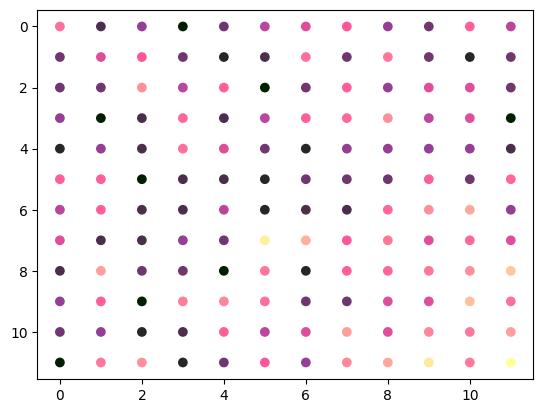

In [155]:
X = [x['x'] for x in data_from_node]
Y = [x['y'] for x in data_from_node]
C = [x['color-rgb'] for x in data_from_node]
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X, Y, c = C)
plt.gca().invert_yaxis()
plt.show()

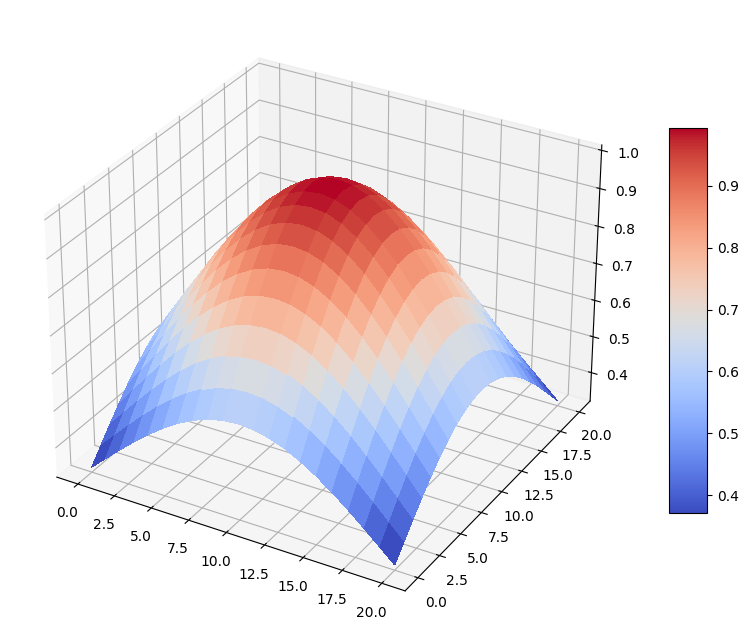

In [144]:
plot_nbh_dist_weight_matrix(som)
plt.show()

In [8]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show

In [9]:
current_df['Genre']
unique_values = current_df['Genre'].unique()

In [10]:
# @title project data

projection = som.transform(train_data)

In [11]:
# @title update dataframe

X = [x[0] for x in projection]
Y = [x[1] for x in projection]

current_df['proj_x'] = X
current_df['proj_y'] = Y

In [19]:
import random
def build_color_palette(unique):
    result = {}
    for name in unique:
        # Generating a random number in between 0 and 2^24
        color = random.randrange(0, 2**24)
        # Converting that number from base-10 (decimal) to base-16 (hexadecimal)
        hex_color = hex(color)
        std_color = "#" + hex_color[2:]
        result[name] = std_color
    return result



In [25]:
def assign_colors(palette):
    colors = []
    for genre in current_df['Genre']: #this needs to be set in a variable
        color = palette[genre]
        colors.append(color)
    current_df['colors'] = colors

In [43]:
# Compute mean to hex color

means = []
for array in current_df['noise']:
    mean = np.std(array)
    # mean = random.uniform(0, 1)
    mean = mean * 255
    mean = round(mean)
    mean = '#%02x%02x%02x' % (mean, mean, mean)
    means.append(mean)

print(means)
current_df['noise-mean'] = means

['#111111', '#090909', '#080808', '#111111', '#0c0c0c', '#010101', '#010101', '#050505', '#040404', '#010101', '#010101', '#050505', '#010101', '#050505', '#000000', '#040404', '#010101', '#060606', '#000000', '#000000', '#040404', '#000000', '#010101', '#040404', '#000000', '#010101', '#020202', '#010101', '#000000', '#000000', '#050505', '#030303', '#010101', '#010101', '#020202', '#020202', '#060606', '#141414', '#090909', '#0b0b0b', '#0b0b0b', '#080808', '#020202', '#050505', '#070707', '#000000', '#000000', '#010101', '#0b0b0b', '#060606', '#000000', '#020202', '#020202', '#010101', '#000000', '#000000', '#000000', '#080808', '#060606', '#040404', '#090909', '#090909', '#030303', '#040404', '#010101', '#010101', '#040404', '#040404', '#000000', '#010101', '#080808', '#090909', '#000000', '#000000', '#040404', '#000000', '#020202', '#0b0b0b', '#050505', '#030303', '#0c0c0c', '#050505', '#050505', '#020202', '#000000', '#000000', '#070707', '#000000', '#090909', '#090909', '#030303'

In [45]:
# @title select subset of the dataset to project

test_data = current_df.loc[50: 250]

In [47]:
# @title Build Visualization with Bokeh

TITLE = "SOM Visualization"
TOOLS = "hover,pan,wheel_zoom,box_zoom,reset,save"

palette = build_color_palette(unique_values)
assign_colors(palette)


p = figure(tools=TOOLS, toolbar_location="above", width=1200, title=TITLE)
p.toolbar.logo = "grey"
p.background_fill_color = "#efefef"
p.xaxis.axis_label = "X-axis"
p.yaxis.axis_label = "Y-axis"
p.grid.grid_line_color = "white"
p.hover.tooltips = [
    ("Genre", "@Genre")
]


source = ColumnDataSource(test_data)

p.scatter("proj_x", "proj_y", size=12, source=source, color="colors",line_color="black", alpha=0.9)

labels = LabelSet(x="X-axis", y="Y-axis", text="symbol", y_offset=8,
                  text_font_size="11px", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)


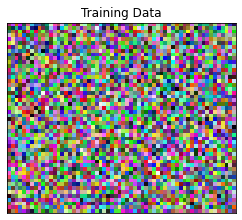

In [ ]:
# @markdown Display the trining data
fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[])
    )
shape_x = 50 # @param{type:"integer"}
shape_y = 60 # @param{type:"integer"}
ax.imshow(train_data.reshape(shape_x, shape_y, 3))
ax.title.set_text('Training Data')

In [ ]:
# @title Project Data
# test_data = rand.randint(20, 200, (3000, 3))
# result = som.transform(test_data)


In [ ]:
result = som.transform(train_data)

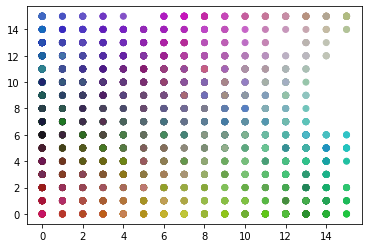

In [ ]:
X = [x[0] for x in result]
Y = [x[1] for x in result]
C = test_data
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X, Y, c = C/255.0)
plt.show()